# Creating whl files for installing external libraries on kaggle notebooks without internet access

In this work, we will learn how to create whl files for installing external libraries on your kaggle notebook. This is necessary when the internet access from the notebook is denied, which is the case for many code competitions. 

**NOTE**: I'm not quite sure if using external libraries is forbidden on this competition. I wasn't able to find any info on that, please correct me if I'm wrong. 

## 1. Intro

A code competition on kaggle is a special type of competition where participants have restricted access to CPU/GPU runtime, internet, ability to use external data, and so on. The [requirements for this competition](https://www.kaggle.com/c/commonlitreadabilityprize/overview/code-requirements) is as followed. 

- CPU Notebook <= 3 hours run-time
- GPU Notebook <= 3 hours run-time
- Internet access disabled
- Freely & publicly available external data is allowed, including pre-trained models
- Submission file must be named submission.csv

The internet access is disabled for this competition, which means you can't install external libraries directly from the [PyPI](https://pypi.org/) repositories. **However, what if using external libraries is NECESSARY for your inference notebook?** In this case, we have to use kaggle datasets along with whl files to install the packages. To be more specific, the process for installing external packages on kaggle notebook without access to the internet is as followed. 

1. load whl files for the external package on kaggle dataset
2. attach the whl files on your notebook (NOTE: this notebook should have the internet access disabled)
3. install the whl files using `pip install` command

In this notebook we will learn how to create a `wheelhouse` for the external libraries that you want to download on the kaggle notebook when the internet access is disabled. A `wheelhouse` is a folder that contains all the whl files needed to install a package. By using whl files, we can install a package without access to the internet. 

## 2. Methods

### 2.1 Install the desired external package

First, we will install the desired external package. In this step, the internet access should be enabled as below. 

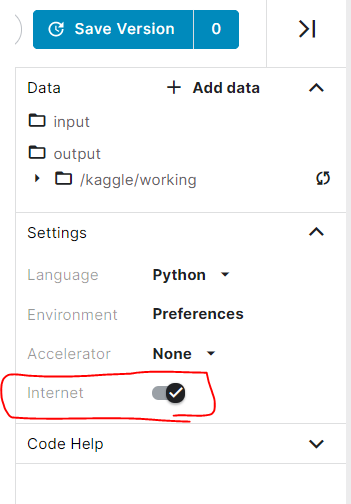

On this example, we will download PyCaret v2.3.1 and make it into whl files. PyCaret is not a default library on kaggle notebook. This can be checked by using the code below. 

In [ ]:
!pip show pycaret

Since PyCaret is not on kaggle notebook, we will install it by using `pip install` and download it from [PyPI](https://pypi.org/). The `-q` option is used to mute the messages when downloading the package. 

In [ ]:
!pip install -q pycaret

By using `pip show` command, we can see that PyCaret 2.3.1 has been installed.

In [ ]:
!pip show pycaret

### 2.2 Make wheelhouse

Now we have the PyCaret installed, we have to create the `wheelhouse` which contains all the whl files needed for installing PyCaret. We will first make a `wheelhouse` directory and change the current working directory to that folder. 

In [ ]:
!mkdir wheelhouse
%cd wheelhouse

`pip wheel` command will create all the whl files needed to install PyCaret package. 

In [ ]:
!pip wheel pycaret

By using `ls` command, we can view all the files that have been created inside the `wheelhouse` folder. All these dependencies are needed to install PyCaret. 

In [ ]:
# current working directory is '/kaggle/working/wheelhouse'
!ls

### 2.3 Create a zip file for exporting the wheelhouse

Now we have all the whl files, we have to export it to our local machine so we can upload it on [kaggle datasets](https://www.kaggle.com/datasets). In order to export all whl files at once, we will zip the `wheelhouse` folder. We will first change the current working directory to `/kaggle/working`

In [ ]:
%cd ../
!ls

After that, use the code below to zip the `wheelhouse` folder to `pycaret_2.3.1.zip` file. 

In [ ]:
!zip -r pycaret_2.3.1.zip wheelhouse

We can observe that `pycaret_2.3.1.zip` has been created as shown below. 

In [ ]:
!ls

### 2.4 Export the zip file to the local machine

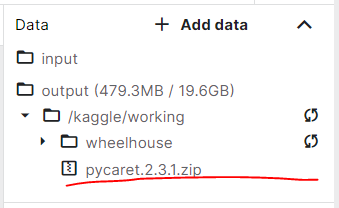

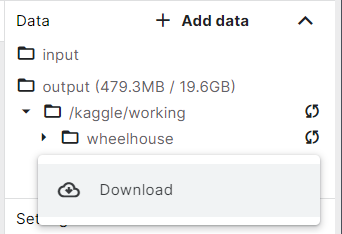

After the zip file has been created, hover your mouse over the file and click `More actions > Download` to export the zip file to your local machine. After that, go to [kaggle datasets](https://www.kaggle.com/datasets) and upload the zip file that contains the `wheelhouse` for installing the external package. My example of the dataset is on [HERE](https://www.kaggle.com/jiny333/pycaret-231-whl).

### 2.5 Install the whl files on a seperate kaggle notebook without internet connection

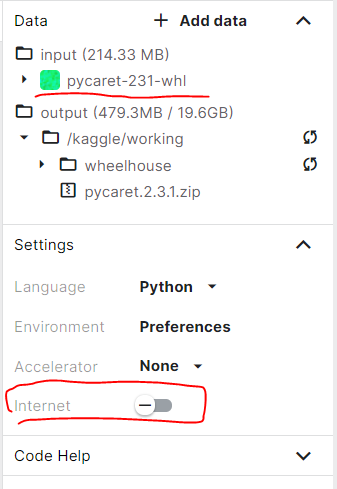

Now we have the kaggle dataset ready, attach it to a new notebook and disable the internet so it meets the requirements of the code competition. 

In [ ]:
!ls ../input/pycaret-231-whl

Unzip the zip file using the code below.

In [ ]:
!unzip ../input/pycaret-231-whl/pycaret_2.3.1.zip -d ../pycaret

In [ ]:
!ls ../pycaret/

After unzipping the zip file, use the command below to install all the whl files. This doesn't require any internet connection. After the installation is finished, you will be able to use the external package on your kaggle notebook. 

In [ ]:
!pip install --no-index --no-deps ../pycaret/wheelhouse/*.whl

## 3. Reference

- https://stackoverflow.com/questions/57942120/how-to-package-all-my-library-dependencies-in-wheel-file
- https://linuxize.com/post/how-to-zip-files-and-directories-in-linux/